# Exercise 2


In [11]:
using ITensors
using PyPlot
using LaTeXStrings   

The transverse field Ising model (TFIM) is known to exhibit a phase transition when $h = J$. In this exercise, we will examine this phase transition by investigating
* The mass gap $\Delta E = E_1-E_0$
* The order parameter, i.e., the magnetization $M_z = \frac{1}{N}\sum_i \langle \sigma_i^Z \rangle$, and $M_z^2 = \frac{1}{N^2}\sum_{i,j} \langle \sigma_i^Z \sigma_j^Z \rangle$
* The correlation, i.e., $\langle \sigma_i^Z \sigma_{i+r}^Z \rangle$
* Entanglement entropy

In [13]:
function TFIM_mpo(N; J=1, h=0.5)
    
    H = OpSum()
    
    for j in 1:N-1
        H .+= -J, "Z", j, "Z", j+1
    end
    
    for j in 1:N
        H .+= -h, "X", j
    end
    
    return H
    
end


TFIM_mpo (generic function with 1 method)

## 1. Ground state and excited state with MPS

We consider first the case where $h < J$

### a. Ground state

In [14]:
N = 50
J = 1
h = 0.5
sites = siteinds("S=1/2", N);

rand_psi = randomMPS(sites, 2)
    
nsweeps = 100
maxdim = [10, 10, 20, 20, 40, 40, 80, 80]
cutoff = [1E-12]
noise = [1E-3]

H = MPO(TFIM_mpo(N; J=J, h=h), sites);

E0, psi0 = dmrg(H, rand_psi; nsweeps, maxdim, cutoff, noise, outputlevel=1)
println("h = $h, E0 = $E0")


After sweep 1 energy=-50.87203711900898  maxlinkdim=10 maxerr=3.28E-06 time=14.860
After sweep 2 energy=-52.244858501072386  maxlinkdim=10 maxerr=1.07E-06 time=0.040
After sweep 3 energy=-52.30654843519202  maxlinkdim=20 maxerr=4.72E-11 time=0.035
After sweep 4 energy=-52.30654945088401  maxlinkdim=7 maxerr=8.96E-13 time=0.030
After sweep 5 energy=-52.30654945088542  maxlinkdim=7 maxerr=8.97E-13 time=0.029
After sweep 6 energy=-52.306549450885306  maxlinkdim=7 maxerr=8.97E-13 time=0.029
After sweep 7 energy=-52.306549450885186  maxlinkdim=7 maxerr=8.97E-13 time=0.029
After sweep 8 energy=-52.30654945088506  maxlinkdim=7 maxerr=8.97E-13 time=0.029
After sweep 9 energy=-52.306549450885164  maxlinkdim=7 maxerr=8.97E-13 time=0.027
After sweep 10 energy=-52.306549450885306  maxlinkdim=7 maxerr=8.98E-13 time=0.029
After sweep 11 energy=-52.306549450885264  maxlinkdim=7 maxerr=8.98E-13 time=0.029
After sweep 12 energy=-52.306549450885264  maxlinkdim=7 maxerr=8.97E-13 time=0.027
After sweep 13

In [15]:
linkdims0 = [dim(linkind(psi0, i)) for i in 1:N-1];

function entropy_bond(psi)
    N = length(psi)
    S_values = zeros(N-1)
    for n in 1:N-1
        # put orthogonality center on bond n
        orthogonalize!(psi, n)
        # SVD of site n tensor
        A = psi[n]
        U, S, V = svd(A, (siteinds(psi, n)))
        s = storage(S)
        p = s.^2
        p = p[p .> 1e-14]   # remove numerical zeros
        S_values[n] = -sum(p .* log2.(p))
    end
    return S_values
end


entropy0 = entropy_bond(psi0);

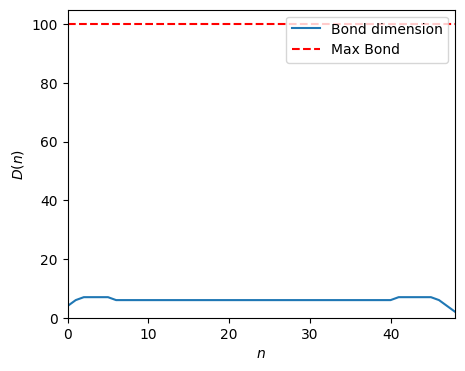

In [16]:
figure(figsize=(5,4))
plot(linkdims0, label="Bond dimension")
hlines(100, 0, 50, label="Max Bond", color="r", linestyle="--")
ylabel(L"$D(n)$")
xlabel(L"$n$")
ylim(0, nothing)
xlim(0, 48)
legend()
display()

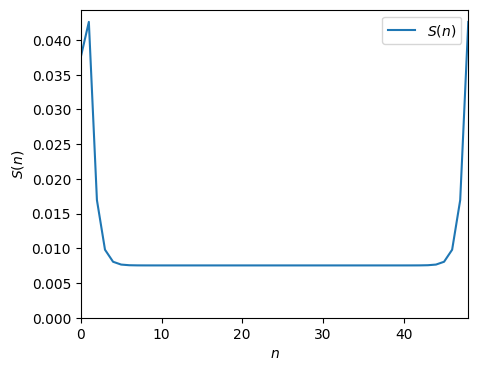

In [17]:
figure(figsize=(5,4))
# plot(log2.(linkdims), "--", label=L"maximum")
plot(entropy0, label=L"S(n)")
ylabel(L"$S(n)$")
xlabel(L"$n$")
ylim(0, nothing)
xlim(0, 48)
legend()
display()

### b. Excited state

In [19]:
rand_psi = randomMPS(sites, 2)

nsweeps = 100
maxdim = [10, 10, 20, 20, 40, 40, 80, 80]
cutoff = [1E-12]
noise = [1E-3]
weight = 5

E1, psi1 = dmrg(H, [psi0], rand_psi; nsweeps, maxdim, cutoff, noise, weight, outputlevel=1)
println("h = $h, E1 = $E1")

After sweep 1 energy=-49.726997188990104  maxlinkdim=10 maxerr=1.03E-06 time=0.315
After sweep 2 energy=-51.435173901654636  maxlinkdim=10 maxerr=2.23E-06 time=0.044
After sweep 3 energy=-52.30646221798736  maxlinkdim=20 maxerr=3.94E-09 time=0.057
After sweep 4 energy=-52.30654945082636  maxlinkdim=11 maxerr=9.91E-13 time=0.045
After sweep 5 energy=-52.306549450885235  maxlinkdim=7 maxerr=9.17E-13 time=0.034
After sweep 6 energy=-52.30654945088527  maxlinkdim=7 maxerr=8.97E-13 time=0.036
After sweep 7 energy=-52.30654945088488  maxlinkdim=7 maxerr=8.97E-13 time=0.036
After sweep 8 energy=-52.30654945088479  maxlinkdim=7 maxerr=8.97E-13 time=0.034
After sweep 9 energy=-52.306549450884916  maxlinkdim=7 maxerr=8.97E-13 time=0.036
After sweep 10 energy=-52.30654945088482  maxlinkdim=7 maxerr=8.97E-13 time=0.034
After sweep 11 energy=-52.306549450884816  maxlinkdim=7 maxerr=8.97E-13 time=0.037
After sweep 12 energy=-52.30654945088488  maxlinkdim=7 maxerr=8.97E-13 time=0.034
After sweep 13 e

In [20]:
E1 - E0

1.1368683772161603e-13

## 2. Order parameter $\langle M_z^2\rangle $

In [27]:
function make_Z_mpo(sites, i)
    os = OpSum()
    os .+= "Z", i          # Add Pauli Z on site i
    return MPO(os, sites)
end

# correlation/parity
function make_ZZ_mpo(sites, i, j)
    os = OpSum()
    os .+= "Z", i, "Z", j  # Add Z_i * Z_j term
    return MPO(os, sites)
end

function eval_Mz(psi)
    sites = siteinds(psi)
    N = length(sites)
    return sum([1/N*inner(psi', make_Z_mpo(sites, i), psi) for i in 1:N])
end

function eval_Mz2(psi)
    sites = siteinds(psi)
    N = length(sites)
    return sum([1/N/N*inner(psi', make_ZZ_mpo(sites, i, j), psi) for i in 1:N, j in 1:N])
end

eval_Mz2 (generic function with 1 method)

In [29]:
N = 50
J = 1
h = 5
sites = siteinds("S=1/2", N);


In [31]:
E0_list = []
mz_list = []
mz2_list = []

for h in 0.0:0.1:2
    rand_psi = randomMPS(sites, 2)
    
    nsweeps = 100
    maxdim = [10, 10, 20, 20, 40, 40, 80, 80]
    cutoff = [1E-12]
    noise = [1E-3]
    
    H = MPO(TFIM_mpo(N; J=J, h=h), sites);

    E0, psi0 = dmrg(H, rand_psi; nsweeps, maxdim, cutoff, noise, outputlevel=0)
    mz = eval_Mz(psi0)
    mz2 = eval_Mz2(psi0)
    println("h = $h, E0 = $E0, <M_z> = $mz, <M_z^2> = $mz2")
    append!(E0_list, E0)
    append!(mz_list, mz)
    append!(mz2_list, mz2)
end

h = 0.0, E0 = -49.0, <M_z> = 1.0, <M_z^2> = 1.0
h = 0.1, E0 = -49.13008459463953, <M_z> = -0.9985931087401498, <M_z^2> = 0.9972446815958917
h = 0.2, E0 = -49.52136423123615, <M_z> = 0.9942873864158961, <M_z^2> = 0.9888394018567532
h = 0.3, E0 = -50.176999929901356, <M_z> = -0.9868087175757143, <M_z^2> = 0.9743381127310515
h = 0.4, E0 = -51.10255919154716, <M_z> = -0.975627184981042, <M_z^2> = 0.9528903855292448
h = 0.5, E0 = -52.30654945088538, <M_z> = 0.9598038781030138, <M_z^2> = 0.9230225281294686
h = 0.6, E0 = -53.80138783347792, <M_z> = -0.9376378082235702, <M_z^2> = 0.882151473714403
h = 0.7, E0 = -55.60522135936817, <M_z> = 0.8197471223934387, <M_z^2> = 0.8253818589892661
h = 0.8, E0 = -57.74573570965294, <M_z> = -0.8535397460809042, <M_z^2> = 0.7418368244686186
h = 0.9, E0 = -60.271060217507916, <M_z> = -0.18197924621659423, <M_z^2> = 0.594006639989648
h = 1.0, E0 = -63.30118915527438, <M_z> = 3.6915871496800476e-13, <M_z^2> = 0.2642471269479787
h = 1.1, E0 = -66.8557324328185,

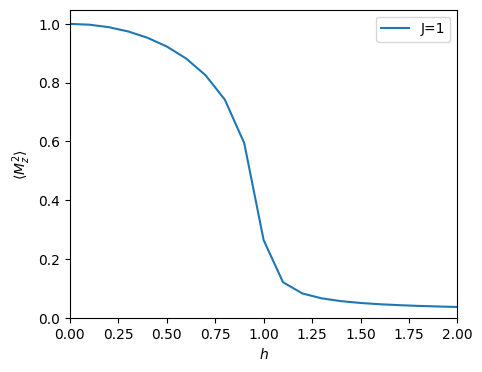

In [38]:
figure(figsize=(5,4))
plot(0.0:0.1:2, mz2_list, label="J=1")
ylabel(L"$\langle M_z^2\rangle$")
xlabel(L"$h$")
ylim(0, nothing)
xlim(0, 2)
legend()
display()

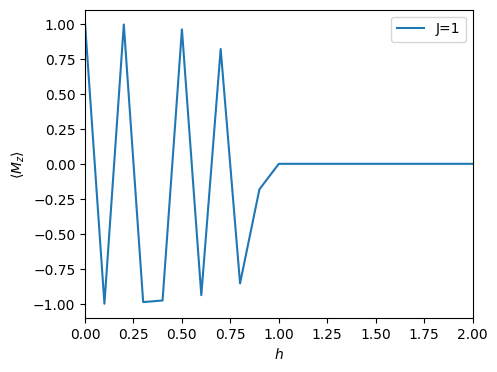

In [40]:
figure(figsize=(5,4))
plot(0.0:0.1:2, mz_list, label="J=1")
ylabel(L"$\langle M_z\rangle$")
xlabel(L"$h$")
# ylim(0, nothing)
xlim(0, 2)
legend()
display()

## Some exercises

Q1. What happen to the mass gap for various $h$? What does the entanglement entropy looks like?

Q2. Check the correlation for various $J$, $h$, $r$.

Q3. What happens to other values of $J$, such as $J=-1$ and $J=2$?

Q4. What if we increase system size?